In [63]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs, make_moons

### data generation and visualization

In [114]:
#X,Y = make_blobs(n_samples=500, centers=2,n_features=2,random_state=1)
X,Y = make_moons(n_samples=1000, shuffle=True, noise=0.2, random_state=1)
print(X.shape,Y.shape)

(1000, 2) (1000,)


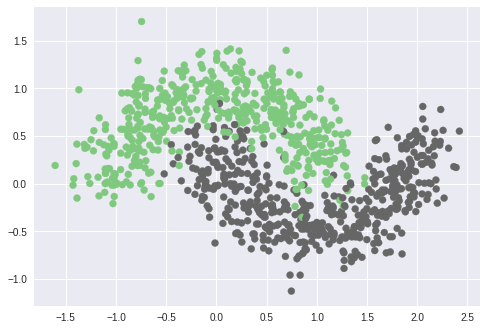

In [115]:
plt.style.use("seaborn")
plt.scatter(X[:,0],X[:,1],c=Y,cmap= plt.cm.Accent)
plt.show()


### model and helper functions

In [116]:
def sigmoid(z):
    return (1.0)/(1+np.exp(-z))

#### implement the perceptron learning algorithm
- learn the weights 
- reduce the loss
- make predictions

In [117]:
def predict(X,weights):
    """X -> mx(n+1) matrix, w -->(nX1,) vector"""
    z = np.dot(X,weights)
    predictions = sigmoid(z)
    return predictions

def loss(X,Y,weights):
    """Binary Cross Entropy"""
    Y_ = predict(X,weights)
    cost = np.mean(-Y*np.log(Y_) - (1-Y)*np.log(1-Y_))
    return cost

def update(X,Y,weights,learning_rate):
    """Perform weight updates for 1 epoch"""
    Y_ = predict(X,weights)
    dw = np.dot(X.T,Y_ - Y)
    
    m = X.shape[0]
    weights = weights - learning_rate*dw/(float(m))
    return weights

def train(X,Y,learning_rate=0.5,maxEpochs=1000):
    
    #Modify the input to handle the bias term
    ones = np.ones((X.shape[0],1))
    X = np.hstack((ones,X))
    
    #Init Weights 0
    weights = np.zeros(X.shape[1]) #n+1 entires
    
    losses = []
    #Iterate over all epochs and make updates
    
    for epoch in range(maxEpochs):
        
        weights = update(X,Y,weights,learning_rate)
        
        if epoch%10==0:
            l = loss(X,Y,weights)
            losses.append(l)
            #print("Epoch %d Loss %.4f"%(epoch,l))
    return weights, losses

In [118]:
weights, losses = train(X,Y,learning_rate=0.3,maxEpochs=1000)

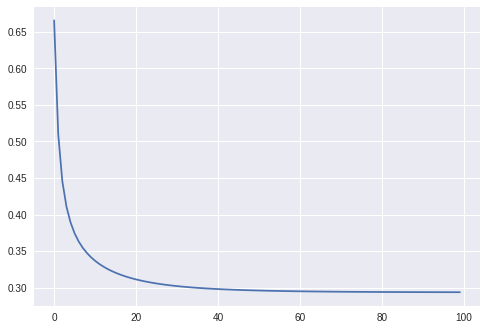

In [119]:
plt.plot(losses);

### Perceptron Implementation
- Make Predictions
- Visualise Decison Surface
- Linear vs Non-linear classification



In [120]:
def getPredictions(X_Test,weights,labels=True):
    if X_Test.shape[1] != weights.shape[0]:
        ones = np.ones((X_Test.shape[0],1))
        X_Test = np.hstack((ones,X_Test))

    probs = predict(X_Test,weights)
    
    if not labels:
        return probs
    else:
        labels = np.zeros(probs.shape)
        labels[probs>=0.5] = 1
        return labels

In [121]:
x1 = np.linspace(-2,2,10)
x2 = -(weights[0] + weights[1]*x1)/weights[2]

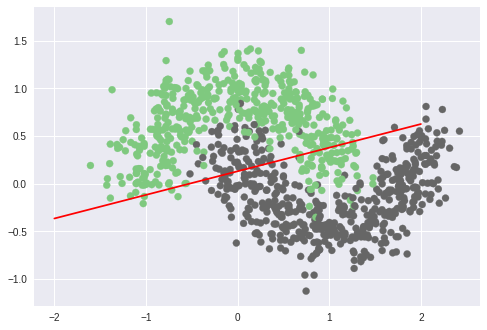

In [122]:
plt.scatter(X[:,0],X[:,1],c=Y,cmap=plt.cm.Accent)
plt.plot(x1,x2,c='red')
plt.show()

In [123]:


# Find the accuracy!
Y_ = getPredictions(X,weights,labels=True)
training_acc = np.sum(Y_==Y)/Y.shape[0]
print(training_acc)



0.868


In [124]:
a = np.array([[1, 0, 0, 0], [1,0, 0, 1], [1, 0, 1, 0], [1, 0, 1, 1], [1, 1, 0, 0], [1, 1, 0, 1], [1, 1, 1, 0], [1, 1, 1, 1]])

In [125]:
b = np.array([0, 1, 1, 1, 1, 1, 1, 1])

In [126]:
print(X.shape, Y.shape)
print(a.shape, b.shape)

(1000, 2) (1000,)
(8, 4) (8,)


In [147]:
weights, losses = train(a ,b,learning_rate=0.3,maxEpochs=100)

In [148]:
weights

array([0.246966  , 0.246966  , 1.38473229, 1.38473229, 1.38473229])

0.19694124820729692


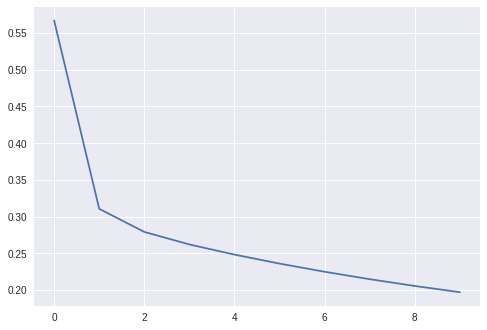

In [149]:
print(losses[-1])
plt.plot(losses)